# PROSAIL Simulation data generator

In [1]:
import sys
import numpy as np
import pandas as pd
from tgess.src.simulation_models.prosail import prosail
import time
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS
tqdm.pandas()
sys.version

'3.6.13 (default, Feb 19 2021, 05:17:09) [MSC v.1916 64 bit (AMD64)]'

## Simulator parameters
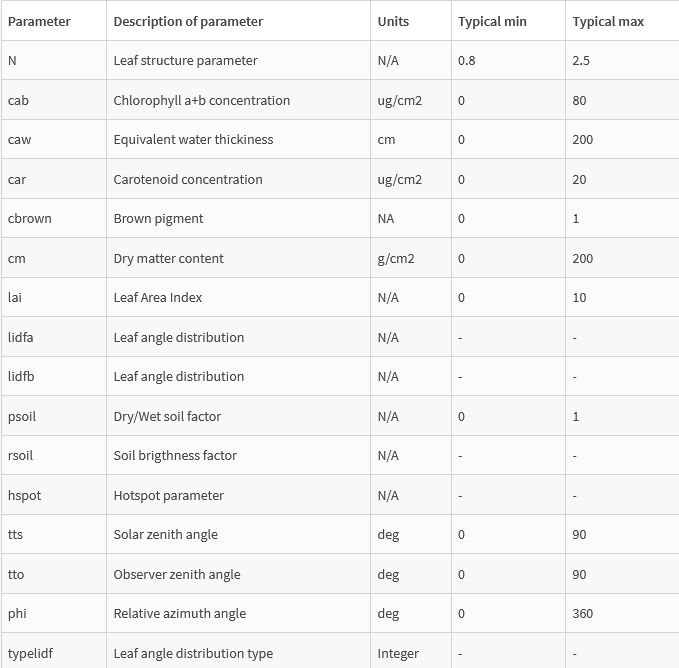

In [2]:
types = ['Mixed Forest', 'Croplands', 'Grasslands', 'Evergreen Broadleaf',
       'Woody Savannas', 'Open Shrublands', 'Grassland',
       'Evergreen Needleleaf', 'Closed Shrublands', 'Deciduous Broadleaf']

nlcdClass = ['deciduousForest', 'cultivatedCrops', 'evergreenForest',
       'mixedForest', 'shrubScrub', 'pastureHay', 'grasslandHerbaceous',
       'woodyWetlands', 'emergentHerbaceousWetlands']

In [3]:
prosail_param_setups = {
    
    "generic":
    # From https://step.esa.int/docs/extra/ATBD_S2ToolBox_L2B_V1.1.pdf
    # and  https://www.sciencedirect.com/science/article/pii/S0034425701002401
    # https://agritrop.cirad.fr/576699/1/576699.pdf
    {
        "n":(1,2.5),
        "cab":(20, 80.0),
        # CAB:CAR = 1:5
        "car":(1,16.0),
        "cbrown":(0,2),
        "cw":(0.0, 0.2),
        "cm":(0.0, 0.2),
        "lai":(0.0,8.0),
        "lidfa":(5,85),
#         "lidfb":(-0.15,-0.15),
        "hspot":(0.05, 0.10),
        "tts":(15,60),
        "tto":(0,10),
        "psi":(0,360),      
        'rsoil': (0.685, 0.685),
        'psoil': (0.9075, 0.9075),
#         "rsoil":(0.4, 0.5),
#         "psoil":(0.0, 1),
        "typelidf":(2,2),     
        "alpha":(40.0,40.0),
#         "ant":(0.0,0.0)
    },
    
    #nlcdClass: dictionary describing parameter ranges
    "deciduousForest":
    # From https://www.sciencedirect.com/science/article/pii/S0034425705003044?casa_token=CjTgNNj3u40AAAAA:BhOXLVDNun1dH9kqUdpb4cI2uiGlOPjHUhpaaa6RLIAhe63kRc5dBcUX9wBfSVOhB4c_zzvy3vU
    {
        # parameter: (min, max)
        "n":(1, 4.5),
        "cab":(0, 80.0),
        "car":(0, 20.0),
        "cbrown":(0.00001, 8),
        "cw":(0.001, 0.15),
        "cm":(0.001, 0.04),
        "lai":(1.0, 7.5),
        "lidfa":(10, 89),
#         "lidfb":(-0.15, -0.15),
        "hspot":(0.01, 1),
        "tts":(15,60),
        "tto":(0,10),
        "psi":(0,360),
        "rsoil":(0.4, 0.5),
        "psoil":(0.0, 1),
        "typelidf":(2,2),     
        "alpha":(40.0,40.0),
        "ant":(0.0,0.0)
    },
    "cultivatedCrops":
    # From: https://www.mdpi.com/2072-4292/10/1/85/htm
    # Taking the min and max from all listed crops
    {
        # parameter: (min, max)
        "n":(1.2, 2.6),
        "cab":(0, 80.0),
        "car":(1, 24.0),
        "cbrown":(0, 1),
        "cw":(0.001, 0.08),
        "cm":(0.001, 0.02),
        "lai":(0.0, 10.0),
        "lidfa":(20, 90),
#         "lidfb":(-0.15, -0.15),
        "hspot":(0.01, 1),
        "tts":(15,60),
        "tto":(0,10),
        "psi":(0,360),
        "rsoil":(0,1),
        "psoil":(0.5, 2),
        "typelidf":(2,2),     
        "alpha":(40.0,40.0),
        "ant":(0.0,0.0)
    },
    "evergreenForest":{
        # From: 
        "n":(2, 2),
        "cab":(20, 60.0),
        "car":(0.6, 16.0),
        "cbrown":(0, 0.6),
        "cw":(0.0, 0.2),
        "cm":(0, 0.2),
        # In study, LAI was fixed to 4.2
        "lai":(0.0, 8.0),
        "lidfa":(20, 90),
#         "lidfb":(-0.15, -0.15),
        "hspot":(0.01, 1),
        "tts":(15,60),
        "tto":(0,10),
        "psi":(0,360),
        "rsoil":(0,1),
        "psoil":(0.5, 2),
        "typelidf":(2,2),     
        "alpha":(40.0,40.0),
        "ant":(0.0,0.0)
    },
    
    "borealForest":{
        # From: https://www.sciencedirect.com/science/article/pii/S0034425709000133?casa_token=-DQrVa7AsTEAAAAA:HtXklPbs6qh92SP0-SYZboyChrgG2qiczkPMXZh68JoSnHEmC-eOo8CF4B60erinLs6BFnE8krA
         
        "n":(1, 4.5),
        "cab":(0, 150.0),
        "car":(0, 37.5),
        "cbrown":(0.00001, 8),
        "cw":(0.0, 0.2),
        "cm":(0, 0.2),
        # In study, LAI was fixed to 4.2
        "lai":(0.0, 8.0),
        "lidfa":(10, 89),
#         "lidfb":(-0.15, -0.15),
        "hspot":(0.01, 1),
        "tts":(15,60),
        "tto":(0,10),
        "psi":(0,360),
        "rsoil":(0,1),
        "psoil":(0.5, 1),
        "typelidf":(2,2),     
        "alpha":(40.0,40.0),
        "ant":(0.0,0.0)
    },
    
}

In [4]:
def latin_hypercube_sampling(parameter_ranges, n_samples=1000):
    
    param_ranges = np.array([parameter_ranges[x] for x in parameter_ranges.keys()])
    param_names = list(parameter_ranges.keys())

    sampling = LHS(xlimits=param_ranges)
    
    samples = sampling(n_samples)
    
    param_configurations = [dict(zip(param_names,sample)) for sample in samples]
    
    return param_configurations
    
        

In [5]:
def create_S2_table(path="../data/raw/", filename="S2-SRF_COPE-GSEG-EOPG-TN-15-0007_3.0.xls"):
    df_s2a = pd.read_excel(io="{}{}".format(path, filename), sheet_name="Spectral Responses (S2A)")
    df_s2b = pd.read_excel(io="{}{}".format(path, filename), sheet_name="Spectral Responses (S2B)")
    
    df_s2b.columns = [col.replace("S2B", "S2A") for col in list(df_s2b.columns)]
    
    df = pd.concat([df_s2a, df_s2b])
    df = df.groupby(df.index).mean()
    df = df[df['SR_WL'].between(400, 2500)]
    df = df.set_index("SR_WL")
    
    return df

def prosail_to_S2(spectra_input, s2_table):
    # Modified from: https://github.com/nunocesarsa/RTM_Inversion/blob/main/Jupyter/RTM%20Inversion/RTM_Pure_Inversion_FunctionCallCorrected_Optimized.ipynb
    rho_s2 = s2_table.multiply(spectra_input, axis="index") #calculates the numerator

    w_band_sum = s2_table.sum(axis=0, skipna = True) #calculates the denominator

    output = (rho_s2.sum(axis=0)/w_band_sum).rename_axis("ID").values #runs the weighted mean and converts the output to a numpy array

    return output


In [6]:
def create_LUT(parameter_ranges, nlcd_class, n_samples=10000, s2_table_path="../data/raw/", \
               s2_table_filename="S2-SRF_COPE-GSEG-EOPG-TN-15-0007_3.0.xls", out_file="PROSAIL_LUT", verbosity=2):
    """
    PROSAIL Parameters
    -----------
    n: float
        The number of leaf layers. Unitless [-].
    cab: float
        The chlorophyll a+b concentration. [g cm^{-2}].
    car: float
        Carotenoid concentration.  [g cm^{-2}].
    cbrown: float
        The brown/senescent pigment. Unitless [-], often between 0 and 1
        but the literature on it is wide ranging!
    cw: float
        Equivalent leaf water. [cm]
    cm: float
        Dry matter [g cm^{-2}]
    lai: float
        leaf area index
    lidfa: float
        a parameter for leaf angle distribution. If ``typliedf``=2, average
        leaf inclination angle.
    tts: float
        Solar zenith angle
    tto: float
        Sensor zenith angle
    psi: float
        Relative sensor-solar azimuth angle ( saa - vaa )
    ant: float, optional
        Anthocyanins content. Used in Prospect-D and Prospect-PRO [g cm^{-2}]
    prot: float, optional
        Protein content. Used in Prospect-PRO. [g cm^{-2}]
    cbc: float, optional
        Carbon based constituents. Used in Prospect-PRO. [g cm^{-2}]
    alpha: float
        The alpha angle (in degrees) used in the surface scattering
        calculations. By default it's set to 40 degrees.
    prospect_version: str
        Which PROSPECT version to use. We have "5", "D" and "PRO"
    typelidf: int, optional
        The type of leaf angle distribution function to use. By default, is set
        to 2.
    lidfb: float, optional
        b parameter for leaf angle distribution. If ``typelidf``=2, ignored
    factor: str, optional
        What reflectance factor to return:
        * "SDR": directional reflectance factor (default)
        * "BHR": bi-hemispherical r. f.
        * "DHR": Directional-Hemispherical r. f. (directional illumination)
        * "HDR": Hemispherical-Directional r. f. (directional view)
        * "ALL": All of them
        * "ALLALL": All of the terms calculated by SAIL, including the above
    rsoil0: float, optional
        The soil reflectance spectrum
    rsoil: float, optional
        Soil scalar 1 (brightness)
    psoil: float, optional
        Soil scalar 2 (moisture)
    soil_spectrum1: 2101-element array
        First component of the soil spectrum
    soil_spectrum2: 2101-element array
        Second component of the soil spectrum
    """
    
    # Create Sentinel-2 Spectral Response Functions table
    s2_table = create_S2_table(path=s2_table_path, filename=s2_table_filename)
    
    samples = latin_hypercube_sampling(parameter_ranges, n_samples)
    
    parameters_LUT = pd.DataFrame(samples)
    reflectances_LUT = []
    reflectances_LUT_S2 = []
    
    if verbosity > 0:
        for sample_params in tqdm(samples, \
                                  desc="Running PROSAIL with configuration {}".format(nlcd_class)\
                                  .format(n_samples, nlcd_class)):
            rho_canopy = prosail.run_prosail(**sample_params, prospect_version='D', \
                                factor='SDR', \
    #                             rsoil0=average_spectrum, \
                                )

            rho_canopy_S2 = prosail_to_S2(rho_canopy, s2_table)

            reflectances_LUT.append(rho_canopy)
            reflectances_LUT_S2.append(rho_canopy_S2)
    else:
        for sample_params in samples:
            rho_canopy = prosail.run_prosail(**sample_params, prospect_version='D', \
                                factor='SDR', \
    #                             rsoil0=average_spectrum, \
                                )

            rho_canopy_S2 = prosail_to_S2(rho_canopy, s2_table)

            reflectances_LUT.append(rho_canopy)
            reflectances_LUT_S2.append(rho_canopy_S2)
    
    bands = [col.replace("S2A_SR_AV_", "") for col in s2_table.columns]
    
    t = time.time()
    
#     LUT = parameters_LUT.join(pd.DataFrame(columns=range(400,2501), data=reflectances_LUT), how="outer")
    
    LUT =  parameters_LUT.join(pd.DataFrame(columns=range(400,2501), data=reflectances_LUT), how="outer")
    LUT_S2 = parameters_LUT.join(pd.DataFrame(columns=bands, data=reflectances_LUT_S2), how="outer")
    if verbosity > 0:
        print("Joined parameters and reflectances into LUT in {} seconds".format(time.time()-t))
    
    t = time.time()
    if verbosity > 0: 
        out_file = out_file+"_{}_{}.csv".format(n_samples, nlcd_class)
        LUT_S2.to_csv(out_file)
    
        print("Successfully created file {} in {} seconds".format(out_file, time.time()-t))
    return LUT, LUT_S2


In [7]:
# %%time

# for n_samples in tqdm([5000, 10000, 50000, 100000], desc="Different number of samples"):
#     for nlcd_class in tqdm(prosail_param_setups.keys(), desc="Different configurations"):
#         df = create_LUT(prosail_param_setups[nlcd_class], nlcd_class, n_samples=n_samples, \
#                    out_file="../data/processed/PROSAIL_LUT_S2")
# #         display(df)

In [8]:
lut_df, lut_s2_df = create_LUT(prosail_param_setups["generic"], "generic", n_samples=100, \
                   out_file="../data/processed/PROSAIL_LUT_S2")

Running PROSAIL with configuration generic:   0%|          | 0/100 [00:00<?, ?it/s]

Joined parameters and reflectances into LUT in 0.16371583938598633 seconds
Successfully created file ../data/processed/PROSAIL_LUT_S2_100_generic.csv in 0.010805130004882812 seconds


In [9]:
lut_df

,n,cab,car,cbrown,cw,cm,lai,lidfa,hspot,tts,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,2.4025,63.5,7.825,0.67,0.089,0.189,0.12,84.6,0.08275,15.225,...,0.272053,0.272053,0.272053,0.272053,0.272053,0.271804,0.271616,0.271366,0.271117,0.270928
1,1.9525,52.7,7.375,1.75,0.159,0.081,2.12,63.8,0.05775,29.175,...,0.044692,0.044697,0.044699,0.044704,0.044707,0.044674,0.044651,0.044618,0.044586,0.044562
2,1.4125,73.1,8.725,1.11,0.045,0.091,3.48,49.4,0.09225,58.425,...,0.006365,0.006372,0.006375,0.006381,0.006384,0.006389,0.006394,0.006400,0.006405,0.006410
3,2.4325,71.9,9.775,1.03,0.177,0.039,3.64,75.8,0.09625,35.925,...,0.025321,0.025324,0.025326,0.025329,0.025330,0.025313,0.025300,0.025282,0.025264,0.025251
4,2.0425,55.1,14.425,1.27,0.169,0.153,5.40,70.2,0.06275,52.575,...,0.003789,0.003793,0.003795,0.003799,0.003801,0.003805,0.003808,0.003811,0.003815,0.003818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.8325,72.5,12.925,1.93,0.161,0.073,0.52,31.8,0.07425,34.575,...,0.130850,0.130855,0.130857,0.130862,0.130865,0.130754,0.130671,0.130559,0.130448,0.130364
96,1.6375,67.7,11.275,1.17,0.187,0.043,7.88,56.6,0.08225,55.275,...,0.004730,0.004736,0.004739,0.004745,0.004748,0.004754,0.004760,0.004766,0.004772,0.004778
97,1.4725,29.3,14.725,0.55,0.155,0.127,5.56,5.4,0.08125,43.125,...,0.009674,0.009687,0.009693,0.009705,0.009711,0.009723,0.009736,0.009748,0.009760,0.009773
98,2.0275,79.1,11.725,1.01,0.093,0.171,3.00,27.0,0.06875,53.475,...,0.008919,0.008929,0.008933,0.008942,0.008947,0.008955,0.008963,0.008970,0.008978,0.008986


In [40]:
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [19]:
cols = list(range(500, 2500))

In [43]:
x = cols
y = 

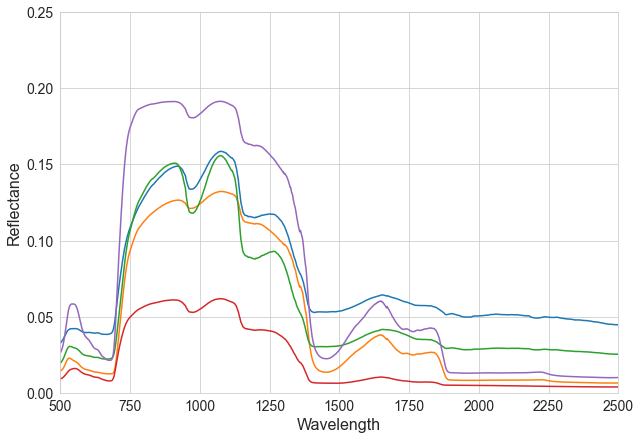

In [50]:
fig, ax = plt.subplots(figsize=(10,7))
for i in range(1, 6):
    sns.lineplot(x=x, y=lut_df.iloc[i][cols].values, ax=ax, palette=("rainbow"))
ax.set_ylim(0, 0.25)
ax.set_xlim(500, 2500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("Wavelength", size=16)
ax.set_ylabel("Reflectance", size=16)
plt.show()

In [91]:
spectral_similarity_rmse(lut_s2_df, in_situ_df)

0.08776503323982407

In [98]:
cols = [str(x) for x in range(400, 2501)]

In [99]:
corr = lut_df[range(400, 2501)].corrwith(lut_df["lai"])

In [100]:
import matplotlib.pyplot as plt

In [95]:
band_centres = {"B1": 442.7, "B2":492.4, "B3":559.8, "B4": 664.6, "B5": 704.1,
               "B6": 740.5, "B7":782.8, "B8":832.8, "B8A":864.7, "B9":945.1,
               "B11": 1613.7, "B12": 2202.4}

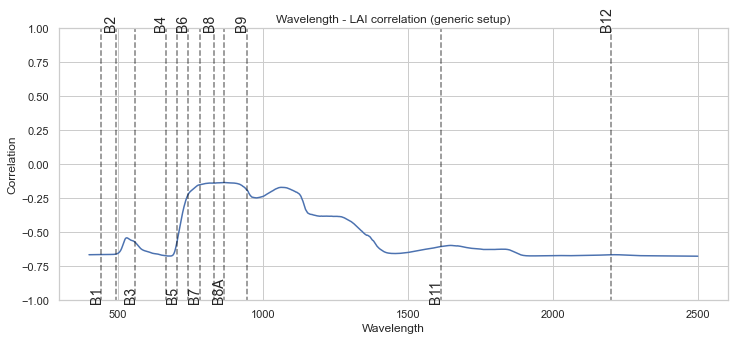

In [101]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(range(400, 2501), corr)
i=0
for key, value in band_centres.items():
    ax.set_title("Wavelength - LAI correlation (generic setup)")
    
    ax.set_xlabel("Wavelength")
    ax.set_ylabel("Correlation")
    ax.axvline(x=value, ymin=-0.3, ymax=1, label=key, \
               linestyle="--", color="black", alpha=0.5)
    
    if i%2==0:
        y=-1
    else:
        y=1
        
    ax.set_ylim(-1,1)
    ax.text(x=value-40, y=y, s=key, rotation=90, fontsize=14)
    i+=1
plt.show()

In [46]:
icraf = pd.read_csv("../data/raw/soil_spectra/ICRAF sample codes.csv", sep='\t', error_bad_lines=False)

In [204]:
icraf["Country name"].unique()

array(['Brazil', nan, 'Australia', 'Ecuador', 'Botswana', 'Costa Rica',
       'Germany', 'Finland', 'France', 'Colombia', 'China', 'Zambia',
       'Peru', 'Mali', 'Ireland', 'Jamaica', 'Greece', 'Ghana', 'Gabon',
       'Spain', 'Cuba', 'Cameroon', "Cote d'Ivoire", 'Hungary',
       'Malaysia', 'Namibia', 'United States', 'Uruguay', 'Indonesia',
       'Japan', 'Netherlands', 'India',
       'Congo, the Democratic Republic of', 'Kenya', 'Pakistan', 'Togo',
       'Philippines', 'Niger', 'Nicaragua', 'Benin', 'Sweden', 'Thailand',
       'Turkey', 'Sri Lanka', 'South Africa',
       'Slovakia (Slovak Republic)', 'Rwanda', 'Zimbabwe', 'Romania',
       'Nigeria', 'Samoa', 'Poland', 'Norway', 'Oman', 'Burkina Faso',
       'Italy', 'Mozambique'], dtype=object)

In [205]:
us_ids = icraf[icraf["Country name"]=='United States']["Batch and labid"]

In [206]:
icraf

,Batch and labid,Sampleno,Country name,Plotcode,HORI,BTOP,BBOT,Dsed
0,FS15R_FS4068,850157,Brazil,BR 1,1.0,0.0,14.0,4.822
1,FS15R_FS4069,850158,Brazil,BR 1,2.0,14.0,30.0,26.805
2,FS15R_FS4070,850159,Brazil,BR 1,3.0,30.0,38.0,31.503
3,FS15R_FS4071,850160,Brazil,BR 1,4.0,38.0,50.0,40.451
4,FS15R_FS4072,850161,Brazil,BR 1,5.0,50.0,80.0,49.071
...,...,...,...,...,...,...,...,...
4434,FS21_FS9995,770062,Zambia,ZM 1,10.0,120.0,140.0,1.849
4435,FS21_FS9996,770063,Zambia,ZM 2,1.0,0.0,7.0,0.745
4436,FS21_FS9997,770064,Zambia,ZM 2,2.0,7.0,20.0,1.775
4437,FS21_FS9998,770065,Zambia,ZM 2,3.0,20.0,40.0,9.158


In [207]:
soil_spectra = pd.read_csv("../data/raw/soil_spectra/ASD spectra.csv", sep='\t', error_bad_lines=False)
soil_spectra

,Batch_Labid,W350,W360,W370,W380,W390,W400,W410,W420,W430,...,W2410,W2420,W2430,W2440,W2450,W2460,W2470,W2480,W2490,W2500
0,FS15R_FS4076,0.087266,0.072293,0.067882,0.071278,0.070909,0.075602,0.078873,0.082193,0.088196,...,0.394691,0.388342,0.378323,0.363643,0.355189,0.350998,0.347304,0.339293,0.336794,0.342761
1,FS15R_FS4077,0.091761,0.070822,0.069020,0.070133,0.072216,0.076108,0.079003,0.083118,0.089066,...,0.372140,0.364686,0.353332,0.338953,0.333400,0.325874,0.324145,0.326207,0.326426,0.330889
2,FS15R_FS4078,0.089091,0.069347,0.069658,0.068197,0.070051,0.071531,0.072116,0.075222,0.080212,...,0.317970,0.311350,0.300105,0.286626,0.280191,0.276309,0.276022,0.268724,0.279947,0.275649
3,FS15R_FS4079,0.094945,0.088997,0.081051,0.083512,0.085434,0.086396,0.087520,0.090224,0.095810,...,0.325006,0.316872,0.307036,0.291386,0.285994,0.280007,0.281164,0.280671,0.287855,0.290292
4,FS15R_FS4080,0.091239,0.065712,0.065946,0.066217,0.066276,0.064272,0.063520,0.065252,0.068709,...,0.369781,0.361111,0.348867,0.333307,0.325529,0.323597,0.323335,0.320587,0.325964,0.324467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,FS21_FS9996,0.047814,0.048310,0.046190,0.047078,0.046512,0.045272,0.046758,0.046725,0.048166,...,0.413331,0.407350,0.400803,0.393383,0.387425,0.383466,0.381514,0.379713,0.367057,0.379223
4435,FS21_FS9997,0.059975,0.041465,0.041414,0.042063,0.042857,0.041145,0.043146,0.043345,0.045756,...,0.362175,0.356727,0.348739,0.339670,0.334909,0.331045,0.328659,0.322995,0.319353,0.326614
4436,FS21_FS9998,0.073709,0.060482,0.052420,0.051500,0.051700,0.052735,0.052164,0.052379,0.054417,...,0.388367,0.382566,0.373157,0.363362,0.358007,0.352936,0.344330,0.341780,0.348666,0.344181
4437,FS21_FS9999,0.066636,0.058891,0.056510,0.052745,0.049982,0.050144,0.049326,0.049842,0.051371,...,0.386422,0.379406,0.370082,0.360227,0.354623,0.351410,0.345886,0.347730,0.337730,0.344609


In [208]:
us_spectra = soil_spectra[soil_spectra["Batch_Labid"].isin(us_ids)].mean()
us_spectra.index = us_spectra.index.map(lambda x: int(x[1:]))
average_spectrum = us_spectra.loc[400:2500].reindex(range(400,2501)).interpolate()

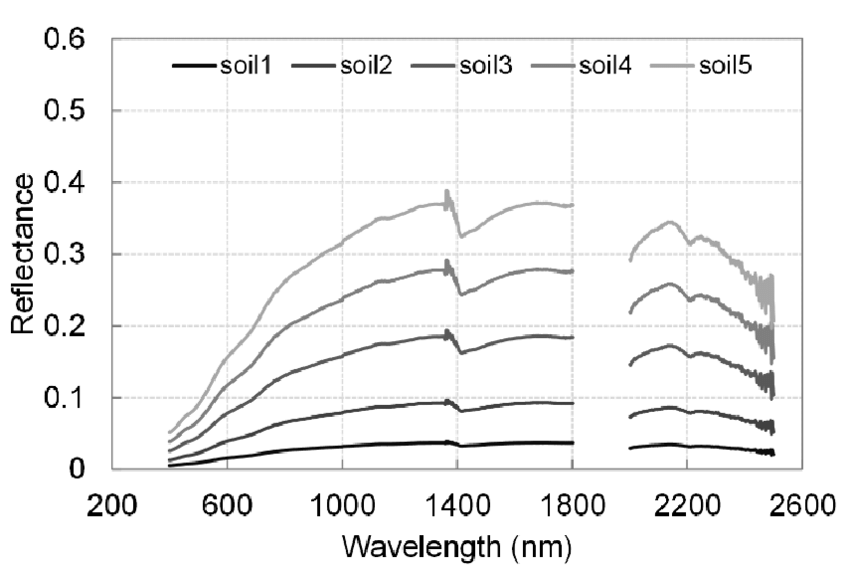

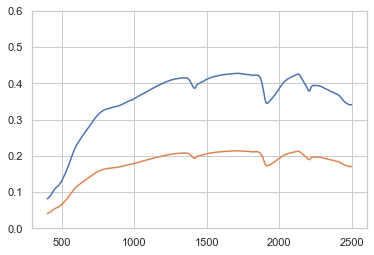

In [209]:
fig, ax = plt.subplots()

ax.plot(average_spectrum.index, average_spectrum.values)
ax.plot(average_spectrum.index, average_spectrum.values*0.5)
ax.set_ylim(0,0.6)
plt.show()

In [24]:
from tgess.src.data_science.plots import *

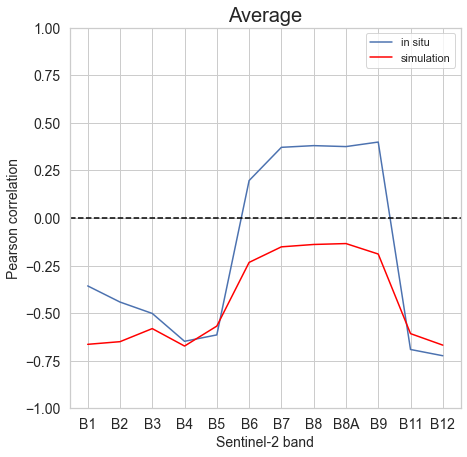

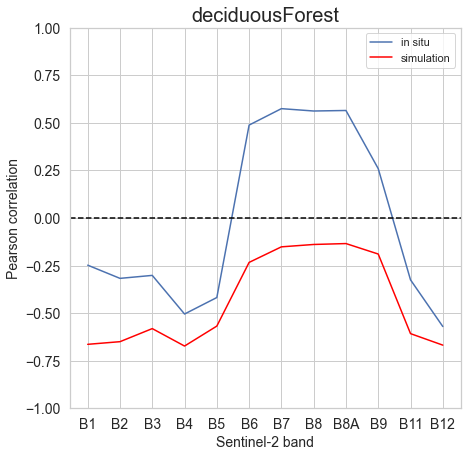

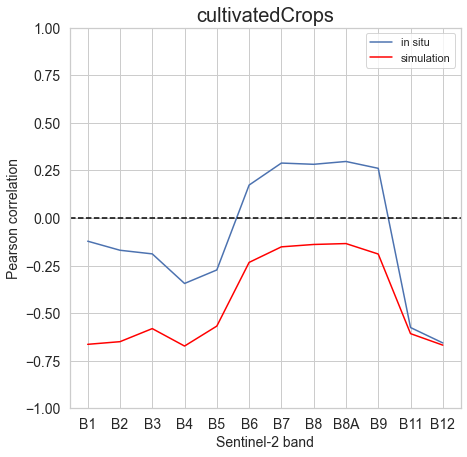

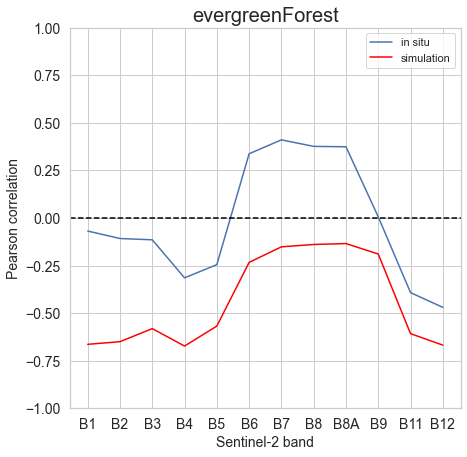

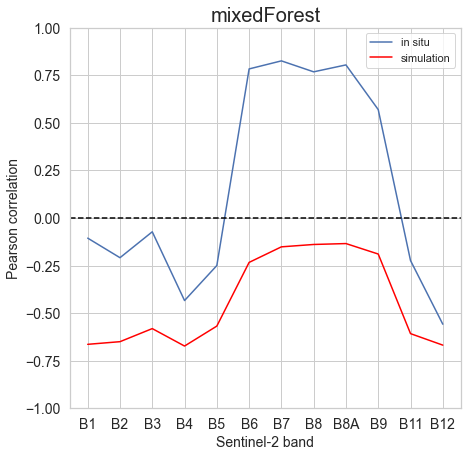

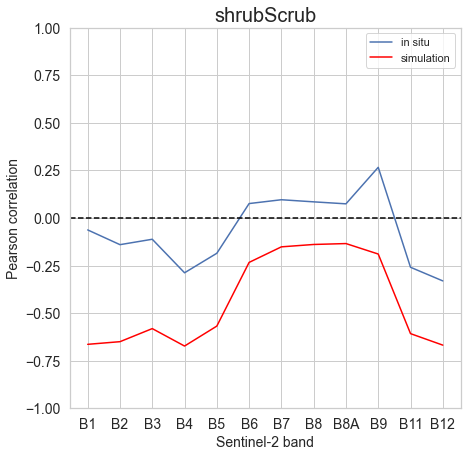

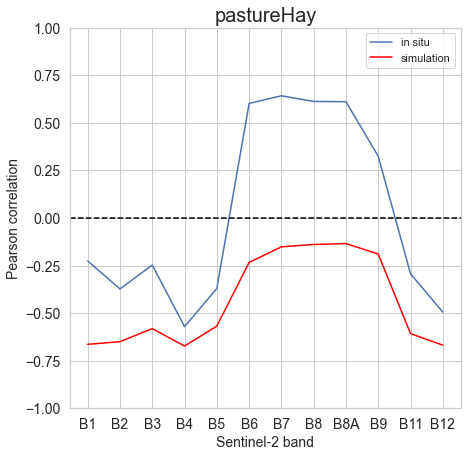

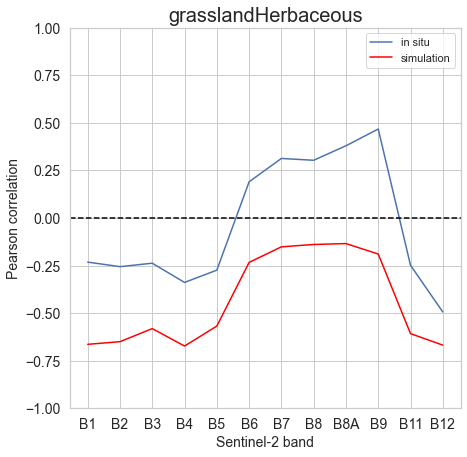

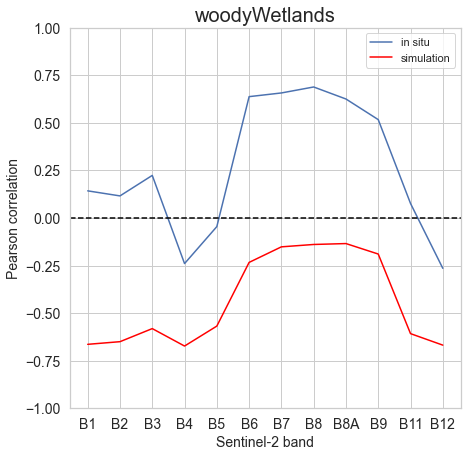

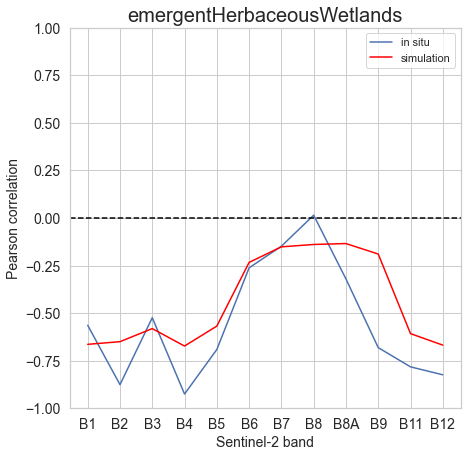

In [102]:
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
in_situ_df = pd.read_csv("../data/processed/GBOV_RM07_in_situ.csv")
simulation_df = lut_s2_df
plot_simulation_in_situ_correlation(in_situ_df, simulation_df, bands, ["LAI_Miller", "lai"], "nlcdClass", "Sentinel-2 band", "Pearson correlation", title="Average")

In [67]:
from sklearn.metrics import mean_squared_error
import logging

# SMAC does not work on Windows
# from ConfigSpace.hyperparameters import UniformFloatHyperparameter

# # Import ConfigSpace and different types of parameters
# from smac.configspace import ConfigurationSpace
# from smac.facade.smac_hpo_facade import SMAC4HPO
# # Import SMAC-utilities
# from smac.scenario.scenario import Scenario

In [68]:
def spectral_similarity_rmse(simulation_df, in_situ_df, target_cols=("LAI_Warren", "lai"), margin=0.05, \
                             bands=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']):
    rmse = []
    for _, row in tqdm(in_situ_df.iterrows(), total=len(in_situ_df), display=False):
        errors = []
        y = row[target_cols[0]]
        # select rows in simulation_df with target value close to y
        simulated_spectra = simulation_df[(simulation_df[target_cols[1]] >= (y*(1-margin))) & \
                                          (simulation_df[target_cols[1]] <= (y*(1+margin)))]

        if len(simulated_spectra) > 0:
            for band in bands:
                y_pred = simulated_spectra[band]
                
                y_true = pd.concat([row]*len(y_pred))[band]
                
                if len(y_pred) == 1:
                    y_true = [y_true]
                    y_pred = [y_pred]
                
                error = np.sqrt(mean_squared_error(y_true, y_pred))
                errors.append(error)

            rmse.extend(errors)
    return np.mean(rmse)

In [215]:
def grid_search_soil_parameters(parameter_ranges, in_situ_df, max_iter=100, n_samples=1000):
    
    initial_config = {"rsoil":(0.0, 1.0),
                   "psoil": (0.0, 1.5)}
    best_config = initial_config
    samples = latin_hypercube_sampling(initial_config, max_iter)
    parameter_ranges["rsoil"] = initial_config["rsoil"]
    parameter_ranges["psoil"] = initial_config["psoil"]
    
    _, simulation_df = create_LUT(parameter_ranges, "generic", n_samples=n_samples, \
                       out_file="../data/processed/temp", verbosity=0)
        
    best_rmse = spectral_similarity_rmse(simulation_df, in_situ_df, target_cols=("LAI_Warren", "lai"), margin=0.10, \
                             bands=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'])
    
    for s in tqdm(samples, desc="Optimizing soil parameters"):
        parameter_ranges["rsoil"] = (s["rsoil"], s["rsoil"])
        parameter_ranges["psoil"] = (s["psoil"], s["psoil"])

        _, simulation_df = create_LUT(parameter_ranges, "generic", n_samples=n_samples, \
                       out_file="../data/processed/temp", verbosity=0)
        
        rmse = spectral_similarity_rmse(simulation_df, in_situ_df, target_cols=("LAI_Warren", "lai"), margin=0.10, \
                             bands=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'])
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_config = s
            print(best_rmse)
            print(best_config)
    
    return best_config

In [216]:
params = grid_search_soil_parameters(prosail_param_setups["generic"], in_situ_df, n_samples=1000)

Optimizing soil parameters:   0%|          | 0/100 [00:00<?, ?it/s]

0.11192115809425625
{'rsoil': 0.28500000000000003, 'psoil': 1.2825}
0.09158737630361892
{'rsoil': 0.685, 'psoil': 0.9075}


In [217]:
params

{'rsoil': 0.685, 'psoil': 0.9075}

In [ ]:
# def rosenbrock_2d(x):
#     """ The 2 dimensional Rosenbrock function as a toy model
#     The Rosenbrock function is well know in the optimization community and
#     often serves as a toy problem. It can be defined for arbitrary
#     dimensions. The minimium is always at x_i = 1 with a function value of
#     zero. All input parameters are continuous. The search domain for
#     all x's is the interval [-5, 10].
#     """
#     x1 = x["x0"]
#     x2 = x["x1"]

#     val = 100. * (x2 - x1 ** 2.) ** 2. + (1 - x1) ** 2.
#     return val


# logging.basicConfig(level=logging.INFO)  # logging.DEBUG for debug output

# # Build Configuration Space which defines all parameters and their ranges
# cs = ConfigurationSpace()
# x0 = UniformFloatHyperparameter("x0", -5, 10, default_value=-3)
# x1 = UniformFloatHyperparameter("x1", -5, 10, default_value=-4)
# cs.add_hyperparameters([x0, x1])

# # Scenario object
# scenario = Scenario({"run_obj": "quality",  # we optimize quality (alternatively runtime)
#                      "runcount-limit": 10,  # max. number of function evaluations; for this example set to a low number
#                      "cs": cs,  # configuration space
#                      "deterministic": "true"
#                      })

# # Example call of the function
# # It returns: Status, Cost, Runtime, Additional Infos
# def_value = rosenbrock_2d(cs.get_default_configuration())
# print("Default Value: %.2f" % def_value)

# # Optimize, using a SMAC-object
# print("Optimizing! Depending on your machine, this might take a few minutes.")
# smac = SMAC4HPO(scenario=scenario,
#                 rng=np.random.RandomState(42),
#                 tae_runner=rosenbrock_2d)

# smac.optimize()